# Татарченков Андрей, РИМ-181228

# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

In [5]:
# 1, 2 - вычисляем среднее значение
x0_mean = x[:,0] - x[:,0].mean()
x1_mean = x[:,1] - x[:,1].mean()
x2_mean = x[:,2] - x[:,2].mean()
x3_mean = x[:,3] - x[:,3].mean()

In [6]:
# 2 - центрируем матрицу данных
x_centered = (x0_mean, x1_mean, x2_mean, x3_mean)

In [7]:
# 3 - вычисляем матрицу ковариаций
cov_matrix = np.cov(x_centered)

In [10]:
# 4 - вычисляем собственные значения 
own_values, own_vectors = np.linalg.eig(cov_matrix)
print('Собственные значения:\n', own_values)

Собственные значения:
 [4.22484077 0.24224357 0.07852391 0.02368303]


In [12]:
#5 - вычисляем собственные векторы
print('Собственные векторы:\n', own_vectors)

Собственные векторы:
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [19]:
# 6 - вычисляем долю общей дисперсии
part_of_dispersion = sum(own_values[:3]) / sum(own_values)
print('Значение доли общей дисперсии:', part_of_dispersion)

Значение доли общей дисперсии: 0.99481691454981


In [7]:
# 7 - r = 2

In [21]:
# 8 - выбираем  r  первых векторов
vectores = own_vectors[:, :2]

	Размерность матрицы после преобразований: (2, 150)


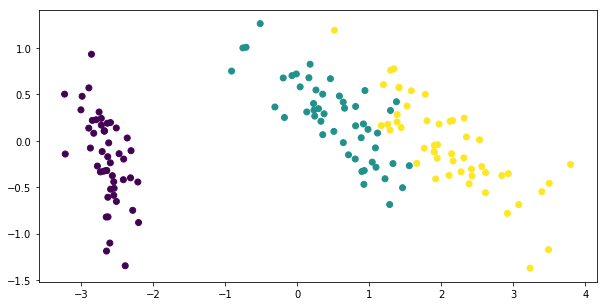

In [26]:
# 9 - уменьшаем признаковое пространство
x_new = np.dot(vectores.transpose(), x_centered)
print('\tРазмерность матрицы после преобразований:', x_new.shape)

plt.scatter(x_new[0], x_new[1], c=y)
plt.gcf().set_size_inches(10,5)

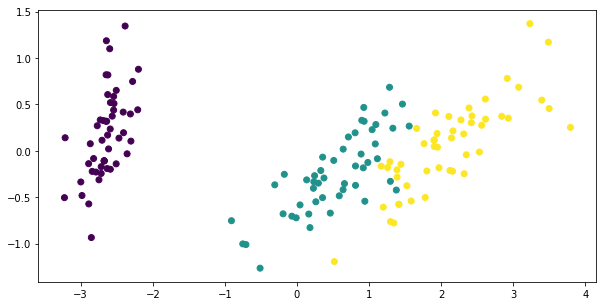

In [28]:
from sklearn.decomposition import PCA

pcaMeth = PCA(n_components=2, random_state=0)
dots = pcaMeth.fit_transform(x)
plt.scatter(dots[:,0], dots[:,1], c=y)
plt.gcf().set_size_inches(10,5)

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

	График зависимости покрываемой дисперсии от кол-ва компонент


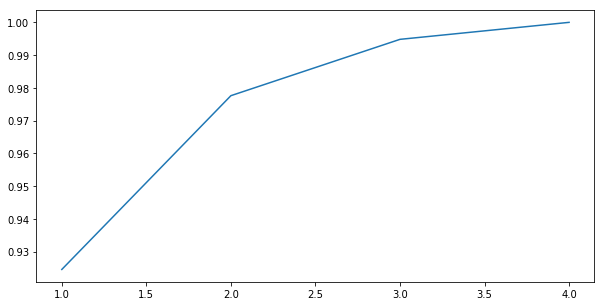

In [34]:
disp_from_main_components = [sum(own_values[:var_variable]) / sum(own_values) for var_variable in range(1,5)]
print('\tГрафик зависимости покрываемой дисперсии от кол-ва компонент')   
plt.plot(range(1,5), disp_from_main_components)
plt.gcf().set_size_inches(10,5)

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [42]:
for i in range(0,4):
    print('Корреляция с исходным стобцом {}:'.format(i))
    print('\t {}'.format(np.corrcoef(x_new[0], x[:,i])[0][1]))
    print('\t {}'.format(np.corrcoef(x_new[1], x[:,i])[0][1]))
    print()

Корреляция с исходным стобцом 0:
	 0.8975448849407613
	 -0.39023141074016715

Корреляция с исходным стобцом 1:
	 -0.3899933790475056
	 -0.8283125928832877

Корреляция с исходным стобцом 2:
	 0.9978540506354597
	 0.04903005633897743

Корреляция с исходным стобцом 3:
	 0.9664841831537925
	 0.04818016974007591

